# Laboratório 2
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: Pré-processamento de Dados

No laboratório de hoje, iremos abordar algumas técnicas de preparação de dados, uma etapa chamada de Pré-processamento. Bases de dados, principalmente de dados reais (extraídos do mundo real, não gerados sinteticamente, e que são usados para resolver problemas reais), quase sempre apresentam algum problema que pode atrapalhar o aprendizado de um modelo de Aprendizado de Máquina (AM), ou podem ser melhorados para ficarem mais adequados para o processamento. Com as técnicas aprendidas no último laboratório, vamos explorar uma base de dados para identificar essas questões, demonstrando alguns métodos de solução.
Este exemplo é adaptado diretamente dos notebooks disponibilizados pelo curso "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina, 2ª Edição", em <https://www.grupogen.com.br/avaconnector/index/redirectMaterial/course/9788521637349>.

Será usada a base de dados Iris [1] que está na pasta raíz deste exercício. É importante destacar que a base de dados Iris usada neste exercício foi modificada pelos autores por motivos didáticos. A versão original dela pode ser encontrada no seguinte link: <https://archive.ics.uci.edu/ml/datasets/iris>. Usando a versão modificada dessa base de dados, será abordado como fazer a eliminação de atributos irrelevantes e o tratamento de valores faltantes. Também será mostrado como tratar valores redundantes ou inconsistentes e como fazer a normalização dos dados. Depois, será feita a detecção e remoção de *outliers* da base dados. Por fim, será mostrado como fazer a análise da distribuição das classes e da correlação entre os atributos.

---
## Carregando os dados

Primeiro, vamos importar todas as bibliotecas que serão usadas ao longo deste exercício.

In [91]:
# -*- coding: utf-8 -*-

import numpy as np # importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd # importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# bibliotecas usadas para geracao de graficos
import seaborn as sns
import matplotlib.pyplot as plt

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


Em seguida, os dados serão carregados do arquivo.

In [92]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'datasets/iris.csv', sep=',', index_col=None) 

print('Dados importados com sucesso!')

Dados importados com sucesso!


Agora, vamos dar uma olhada nas 10 primeiras amostras da base de dados.

In [93]:
# exibe o dataframe
display(df_dataset.head(n=10))

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe
0,0,5.1,3.5,1.4,0.2,São Paulo,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Sorocaba,Iris-setosa
2,2,4.7,3.2,1.3,0.2,São Paulo,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Sorocaba,Iris-setosa
4,4,5.0,3.6,1.4,0.2,São Paulo,Iris-setosa
5,5,5.4,3.9,1.7,0.4,Sorocaba,Iris-setosa
6,6,4.6,3.4,1.4,0.3,São Paulo,Iris-setosa
7,7,5.0,3.4,1.5,0.2,São Paulo,Iris-setosa
8,8,4.4,2.9,1.4,0.2,Campinas,Iris-setosa
9,9,4.9,3.1,1.5,0.1,Sorocaba,Iris-setosa


A base de dados contém amostras de flores (linhas) representadas pelos seguintes atributos (colunas): `id_planta`, `comprimento_sepala`, `largura_sepala`, `comprimento_petala`, `largura_petala` e `cidade_origem`. Por fim, temos o atributo `classe` que contém a espécie de cada flor.

O atributo `id_planta` é qualitativo, uma vez que é usado para identificar uma determinada amostra. Apesar dele possuir valores numéricos crescentes, ele exerce apenas a função de identificação e seus valores poderiam ser trocados por outros identificadores não numéricos sem nenhum prejuízo. O atributo `cidade_origem` também é qualitativo. Os atributos `comprimento_sepala`, `largura_sepala`, `comprimento_petala` e `largura_petala` são quantitativos contínuos.

Quanto à escala, os atributos `id_planta` e `cidade_origem` são qualitativos nominais, enquanto os atributos `comprimento_sepala`, `largura_sepala`, `comprimento_petala` e `largura_petala` são quantitativos racionais.

O atributo `classe` é qualitativo nominal e representa espécies de flores. Portanto, o problema em questão é de <b>aprendizado supervisionado</b> $\rightarrow$ <b>classificação</b>.


## Pré-processamento: codificando variáveis categóricas
Como vimos, essa base possui dados numéricos e categóricos, e podem ser transformados de um para outro, como fizemos com o nome das espécies. Como a maioria dos algoritmos de aprendizado de máquina são matemáticos, uma das transformações que podemos precisar fazer é transformar atributos textuais ou categóricos em outro formato, em dados numéricos, sem comprometer o entendimento do modelo. Mas, para isso, precisamos levar em conta se os valores são ordinais (em que há uma ordem) ou nominais (em que a ordem dos valores não é relevante).

### Ordinais
Quando a ordem é importante, precisamos transmitir isso para os valores numéricos que substituirão os categóricos. Por exemplo: se um valor é maior que um e menor que outro, ou se é maior que um e ainda maior que outro. Essas relações devem estar representadas nos dados.
Na base escolhida, não temos nenhum atributo que seja desse tipo, mas, para exemplificar, imaginemos que há um novo atributo referente ao tamanho da flor de forma geral, categorizando cada linha como `Pequena`, `Média` ou `Grande`. Esse seria um método de alterar esses valores, utilizando o OrdinalEncoder do scikit-learn:

In [94]:
from sklearn.preprocessing import OrdinalEncoder

# Cria um DataFrame de exemplo
df = df_dataset.head(5).copy()

# Crie uma nova coluna categórica
df['tamanho'] = ['Pequena', 'Grande', 'Média', 'Pequena', 'Grande']

# OrdinalEncoder
ord_encoder = OrdinalEncoder(categories=[['Pequena', 'Média', 'Grande']])
df['tamanho_encoded'] = ord_encoder.fit_transform(df[['tamanho']])

display("\nDataFrame com Ordinal Encoding:")
display(df)


'\nDataFrame com Ordinal Encoding:'

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,cidade_origem,classe,tamanho,tamanho_encoded
0,0,5.1,3.5,1.4,0.2,São Paulo,Iris-setosa,Pequena,0.0
1,1,4.9,3.0,1.4,0.2,Sorocaba,Iris-setosa,Grande,2.0
2,2,4.7,3.2,1.3,0.2,São Paulo,Iris-setosa,Média,1.0
3,3,4.6,3.1,1.5,0.2,Sorocaba,Iris-setosa,Pequena,0.0
4,4,5.0,3.6,1.4,0.2,São Paulo,Iris-setosa,Grande,2.0


### Nominais
Já os atributos `cidade_origem` e `classe` não possuem uma relação de ordem conhecida entre os nomes, então precisamos fornecer valores que não indiquem ordem nenhuma. Uma técnica tradicional de realizar isso é através de One-Hot Encoding. Essa técnica cria um atributo para cada um dos possíveis valores, que recebe o valor 1 caso o elemento possua o valor do atributo e 0 caso o contrário. Por exemplo, para `cidade_origem`, seriam criados atributos para cada uma das cidades da base de dados, se a flor daquela linha é de Sorocaba, ela teria o valor 1 no atributo referente à Sorocaba e 0 nas demais cidades.

Veremos a seguir um exemplo de aplicação com a função OneHotEncoder do scikit. Note que estamos "dropando" a primeira coluna, que seria da cidade de Campinas, pois ela pode ser representada a partir de zeros nas demais cidades, sendo desnecessário um atributo somente para ela. Esse problema é chamado "Dummy Variable Trap".

In [95]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder para a coluna 'cidade_origem'
ohe_encoder = OneHotEncoder(sparse_output=False, drop='first') # `drop` para evitar a "Dummy Variable Trap"
cidade_encoded = ohe_encoder.fit_transform(df_dataset[['cidade_origem']])

# Criação de um novo DataFrame com as colunas one-hot encoded
cidade_df = pd.DataFrame(cidade_encoded, columns=ohe_encoder.get_feature_names_out(['cidade_origem']))
df = pd.concat([df_dataset, cidade_df], axis=1)

display("\nDataFrame com One-Hot Encoding:")
display(df.drop('cidade_origem', axis=1))


'\nDataFrame com One-Hot Encoding:'

,id_planta,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe,cidade_origem_Sorocaba,cidade_origem_São Paulo
0,0,5.1,3.5,1.4,0.2,Iris-setosa,0.0,1.0
1,1,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0
2,2,4.7,3.2,1.3,0.2,Iris-setosa,0.0,1.0
3,3,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0
4,4,5.0,3.6,1.4,0.2,Iris-setosa,0.0,1.0
...,...,...,...,...,...,...,...,...
147,145,6.7,3.0,5.2,2.3,Iris-virginica,0.0,1.0
148,146,6.3,2.5,5.0,1.9,Iris-virginica,0.0,0.0
149,147,6.5,3.0,5.2,2.0,Iris-virginica,1.0,0.0
150,148,6.2,3.4,5.4,2.3,Iris-virginica,1.0,0.0


## Pré-processamento: eliminação de atributos irrelevantes

O objetivo do problema é identificar a espécie de uma flor (`classe`), dados os demais atributos. Neste caso, não é preciso uma análise profunda para observar que os atributos `id_planta` e `cidade_origem` não contribuem para a identificação da classe. Portanto, em uma tarefa de aprendizado de máquina, devemos remover esses atributos, pois são irrelevantes. Em cenários reais, muitas vezes é necessário consultar especialistas para ajudar a identificar quais atributos são irrelevantes.

In [96]:
# remove as colunas id_planta e cidade_origem
df_dataset = df_dataset.drop(columns=['id_planta','cidade_origem'])

# imprime o dataframe
display(df_dataset.head(n=10))

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Pré-processamento: tratamento de atributos com valores ausentes

Outro passo importante, é verificar se existem atributos com valores ausentes (*NaN*) na base de dados.

In [97]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df_dataset).any(axis=1).to_numpy().nonzero()[0]

# imprime apenas as linhas com valores ausentes
display(df_dataset.iloc[idxRowNan])

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,NaN,1.7,0.5,Iris-setosa
24,4.8,NaN,1.9,0.2,Iris-setosa
30,4.8,3.1,NaN,0.2,Iris-setosa


Como podemos ver, o atributo `largura_sepala` possui 2 amostras com valores ausentes. Já o atributo `comprimento_petala` possui 1 amostra com valor faltante. 

Existem diversas técnicas para tratar atributos faltantes, que dependem do tipo de atributo e problema em questão. Uma opção pode ser substituílos por um valor fixo que indique a falta de valor, como 0 ou -1, especialmente aplicável para dados nominais. Também podemos aplicar um valor que acreditamos ser mais próximo do correto, como a média, a mediana ou moda dos valores, ou mesmo calcular através de outros atributos (talvez até mesmo usando Aprendizado de Máquina para isso!). Em alguns casos ainda, existem outros elementos próximos que podem ser usados para aproximar o valor, com uma técnica chamada de interpolação, que não será abordada agora. Em último caso, também podemos apenas eliminar os elementos com dados faltantes da base.

In [98]:
ausentes = df_dataset.iloc[idxRowNan]

display("Preenchendo com 0:",ausentes.fillna(0)) # Preenche valores ausentes com 0

display("Preenchendo com a média:", ausentes.fillna(df_dataset.mean(numeric_only=True))) # Preenche valores ausentes com a média dos valores conhecidos

display("Removendo linhas com valores ausentes:",ausentes.dropna()) # Remove os valores ausentes da base

'Preenchendo com 0:'

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,0.0,1.7,0.5,Iris-setosa
24,4.8,0.0,1.9,0.2,Iris-setosa
30,4.8,3.1,0.0,0.2,Iris-setosa


'Preenchendo com a média:'

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,3.182,1.700000,0.5,Iris-setosa
24,4.8,3.182,1.900000,0.2,Iris-setosa
30,4.8,3.100,3.776821,0.2,Iris-setosa


'Removendo linhas com valores ausentes:'

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe


Como este problema possui poucos valores ausentes, vamos preencher esses valores com a média dos valores conhecidos da respectiva classe (`Iris-setosa`).

In [99]:
def trataFaltantes( df_dataset ):
    '''
    Substitui os valores faltantes pela média dos outros valores do mesmo atributo
    de amostras que sejam da mesma classe    
    '''
    
    # seleciona apenas as linhas da base de dados onde a coluna largura_sepala não contém valores nulos
    notNull_ls = df_dataset.loc[ ~pd.isnull(df_dataset['largura_sepala']), :]
    notNull_cp = df_dataset.loc[ ~pd.isnull(df_dataset['comprimento_petala']), :]

    # calcula a media dos valores do atributo largura_sepala que não são nulos e que são da classe Iris-setosa 
    media_ls = notNull_ls[ notNull_ls['classe']=='Iris-setosa' ]['largura_sepala'].mean()
    media_cp = notNull_cp[ notNull_cp['classe']=='Iris-setosa' ]['comprimento_petala'].mean()

    # substitui os valores nulos pela média 
    df_dataset.loc[ pd.isnull(df_dataset['largura_sepala']), 'largura_sepala'] = media_ls
    df_dataset.loc[ pd.isnull(df_dataset['comprimento_petala']), 'comprimento_petala'] = media_cp
    
    return df_dataset

trataFaltantes( df_dataset )
    
# imprime apenas as linhas que antes possuiam valores NaN
print('\nAmostras que possuiam valores faltantes:')
display(df_dataset.iloc[idxRowNan])


Amostras que possuiam valores faltantes:


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
23,5.1,3.416667,1.700000,0.5,Iris-setosa
24,4.8,3.416667,1.900000,0.2,Iris-setosa
30,4.8,3.100000,1.461224,0.2,Iris-setosa


## Pré-processamento: tratamento de dados inconsistentes ou redundantes

Outro passo importante, é verificar se existem dados inconsistentes ou redundantes. A forma mais comum de inconsistência é quando há amostras representadas por atributos com todos os valores iguais, mas com classes diferentes. A redundância é dada pela repetição de linhas na base de dados.

A seguir, vamos verificar se existem amostras duplicadas (redundantes) e inconsistentes.

In [100]:
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

# se houver valores redundantes ou inconsistentes, imprima 
if len(df_duplicates)>0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor
102,5.8,2.7,5.1,1.9,Iris-virginica
123,7.7,2.8,6.7,2.0,Iris-virginica
124,7.7,2.8,6.7,2.0,Iris-virginica
144,5.8,2.7,5.1,1.9,Iris-virginica


Como podemos ver, existem algumas amostras redundantes (duplicadas) e outras inconsistentes (amostras iguais, mas com classes distintas). 

Primeiro, serão removidas as amostras redundantes, mantendo na base apenas uma delas.

In [101]:
def delDuplicatas( df_dataset ):
    '''
    Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
    '''
    
    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_dataset = df_dataset.drop_duplicates(keep = 'first')    

    return df_dataset

df_dataset = delDuplicatas( df_dataset )


Após remover as amostras redundantes, é preciso checar se há amostras inconsistentes. 

In [102]:
# para detectar inconsistências, a rotina abaixo obtém as amostras onde os valores 
# dos atributos continuam duplicados. Neste caso, os atributos serão iguais, mas as classes serão distintas
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

# se tiver valores inconsistentes, imprime 
if len(df_duplicates)>0:
    print('\nAmostras inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem mostras inconsistentes')
    


Amostras inconsistentes:


,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala,classe
49,5.0,3.3,1.4,0.2,Iris-setosa
50,5.0,3.3,1.4,0.2,Iris-versicolor


Podemos ver que existem duas amostras inconsistentes. Nesse caso, como não é possível saber qual delas está correta, as duas serão eliminadas.

In [103]:
def delInconsistencias( df_dataset ):
    '''
    Remove todas as amostras inconsistentes da base de dados
    '''

    df_dataset = df_dataset.drop_duplicates(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'], keep = False)    
  
    return df_dataset

df_dataset = delInconsistencias( df_dataset )

# obtém apenas as amostras onde os valores dos atributos estão duplicados
df_duplicates = df_dataset[ df_dataset.duplicated(subset=['comprimento_sepala','largura_sepala','comprimento_petala','largura_petala'],keep=False)] 

# se tiver valores redundantes ou inconsistentes, imprime 
if len(df_duplicates)>0:
    display(df_duplicates)
else:
    print('Não existem amostras redundantes ou inconsistentes')
    

Não existem amostras redundantes ou inconsistentes


Agora, vamos gerar algumas estatísticas sobre a base de dados.

A função `describe()` da `Pandas` sumariza as principais estatísticas sobre os dados de um *data frame*, como a média, o desvio padrão, valor máximo, valor mínimo e alguns percentis.

In [104]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

display(df_detalhes)

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,146.000000,146.000000,146.000000,146.000000
mean,5.958219,3.190639,3.795625,1.215753
std,1.493284,1.715087,1.755223,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.400000,5.100000,1.800000
max,20.900000,23.100000,6.900000,2.500000


## Pré-processamento: normalização dos atributos

Observe que a média do atributo `comprimento_sepala` é bastante superior a média do atributo `largura_petala`. Diante disso, está claro que a escala dos atributos é diferente, o que pode prejudicar alguns métodos de aprendizado de máquina. Portanto, vamos normalizar os valores dos atributos para que fiquem com média igual a zero e desvio padrão igual a um. Usando a biblioteca *scikit-learn*, poderíamos fazer a normalização usando a função [*sklearn.preprocessing.StandardScaler*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Mas, para exercitar os conceitos aprendidos, vamos criar nossa própria função de normalização. 

In [105]:
def normalizar(X):
    """
    Normaliza os atributos em X
    
    Esta função retorna uma versao normalizada de X onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com 
    métodos de aprendizado de máquina.
    """
    
    m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto
    
    # Incializa as variaves de saída
    X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão
     
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    
    for i in range(m):
        X_norm[i,:] = (X[i,:]-mu) / sigma
        
    
    return X_norm, mu, sigma


# coloca os valores dos atributos na variável X
X = df_dataset.iloc[:,0:-1].values

# chama a função para normalizar X
X_norm, mu, sigma = normalizar(X)

df_dataset.iloc[:,0:-1] = X_norm

print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].')
print('\nPrimeira amostra da base apos normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))



Primeira amostra da base antes da normalização: [5.1000 3.5000].

Após a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].

Primeira amostra da base apos normalização: [-0.5747 0.1804].


Agora que os dados estão normalizados, vamos analisar as informações estatísticas novamente.

In [106]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_dataset.describe()

display(df_detalhes.round(8))

,comprimento_sepala,largura_sepala,comprimento_petala,largura_petala
count,146.000000,146.000000,146.000000,146.000000
mean,0.000000,-0.000000,-0.000000,-0.000000
std,1.000000,1.000000,1.000000,1.000000
min,-1.110451,-0.694215,-1.592746,-1.476211
25%,-0.574719,-0.227766,-1.250909,-1.211599
50%,-0.105954,-0.111154,0.344330,0.111463
75%,0.295845,0.122070,0.743139,0.772995
max,10.005986,11.608365,1.768650,1.699138


Podemos ver acima que a média (*mean*) ficou igual a 0 e o desvio padrão (*std*) igual a 1. 

Esse tipo de técnica é ainda mais importante quando estamos lidando com valores em escalas diferentes. Nesse exemplo, todos os atributos estão em centímetros, e possuem valores relativamente próximos, mas você pode ter percebido, dependendo da base de dados que escolheu no Laboratório 1, que nem sempre isso é verdade. Podemos ter atributos na escala de centenas ou milhares enquanto outros estão em decimais, entre outros casos. Se visualizar esses dados juntos em um boxplot, por exemplo, já é difícil de compreender, é possível imaginar como deve afetar no aprendizado de um modelo. Felizmente, a normalização resolve esse problema e deixa todos os dados na "mesma escala".

## Pré-processamento: detecção de *outliers*

Outro passo importante na análise e tratamento dos dados é a detecção de *outliers* (*i.e.*, dados gerados por leituras incorretas, erros de digitação, etc). 

Uma das maneiras mais simples de verificar se os dados contém *outliers* é criar um gráfico box plot de cada atributo. Para isso, podemos usar a função `boxplot` da biblioteca `Pandas`.

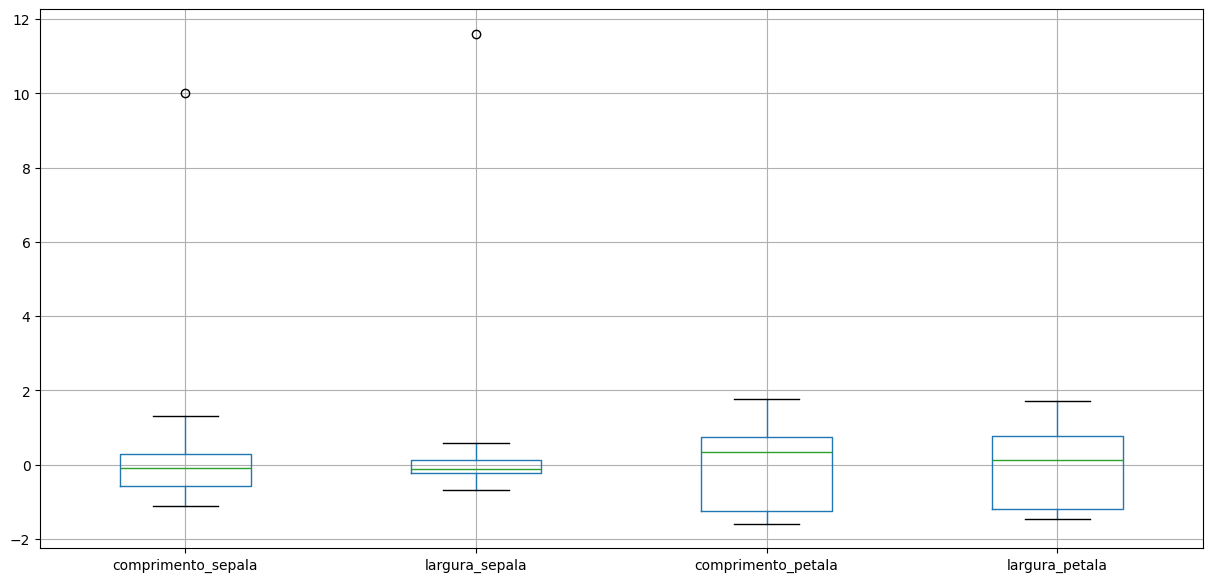

In [107]:
# gera um bloxplot para cada atributo
df_dataset.boxplot(figsize=(15,7))
plt.show()

O box plot está indicando que os atributos `comprimento_sepala` e `largura_sepala` possuem *outliers*, o que pode prejudicar o desempenho de vários métodos de aprendizado de máquina, pois tratam-se de amostras com valores de atributos incorretos. 

Outra forma de analisar se a base de dados contém *outliers* é usar gráficos de dispersão.

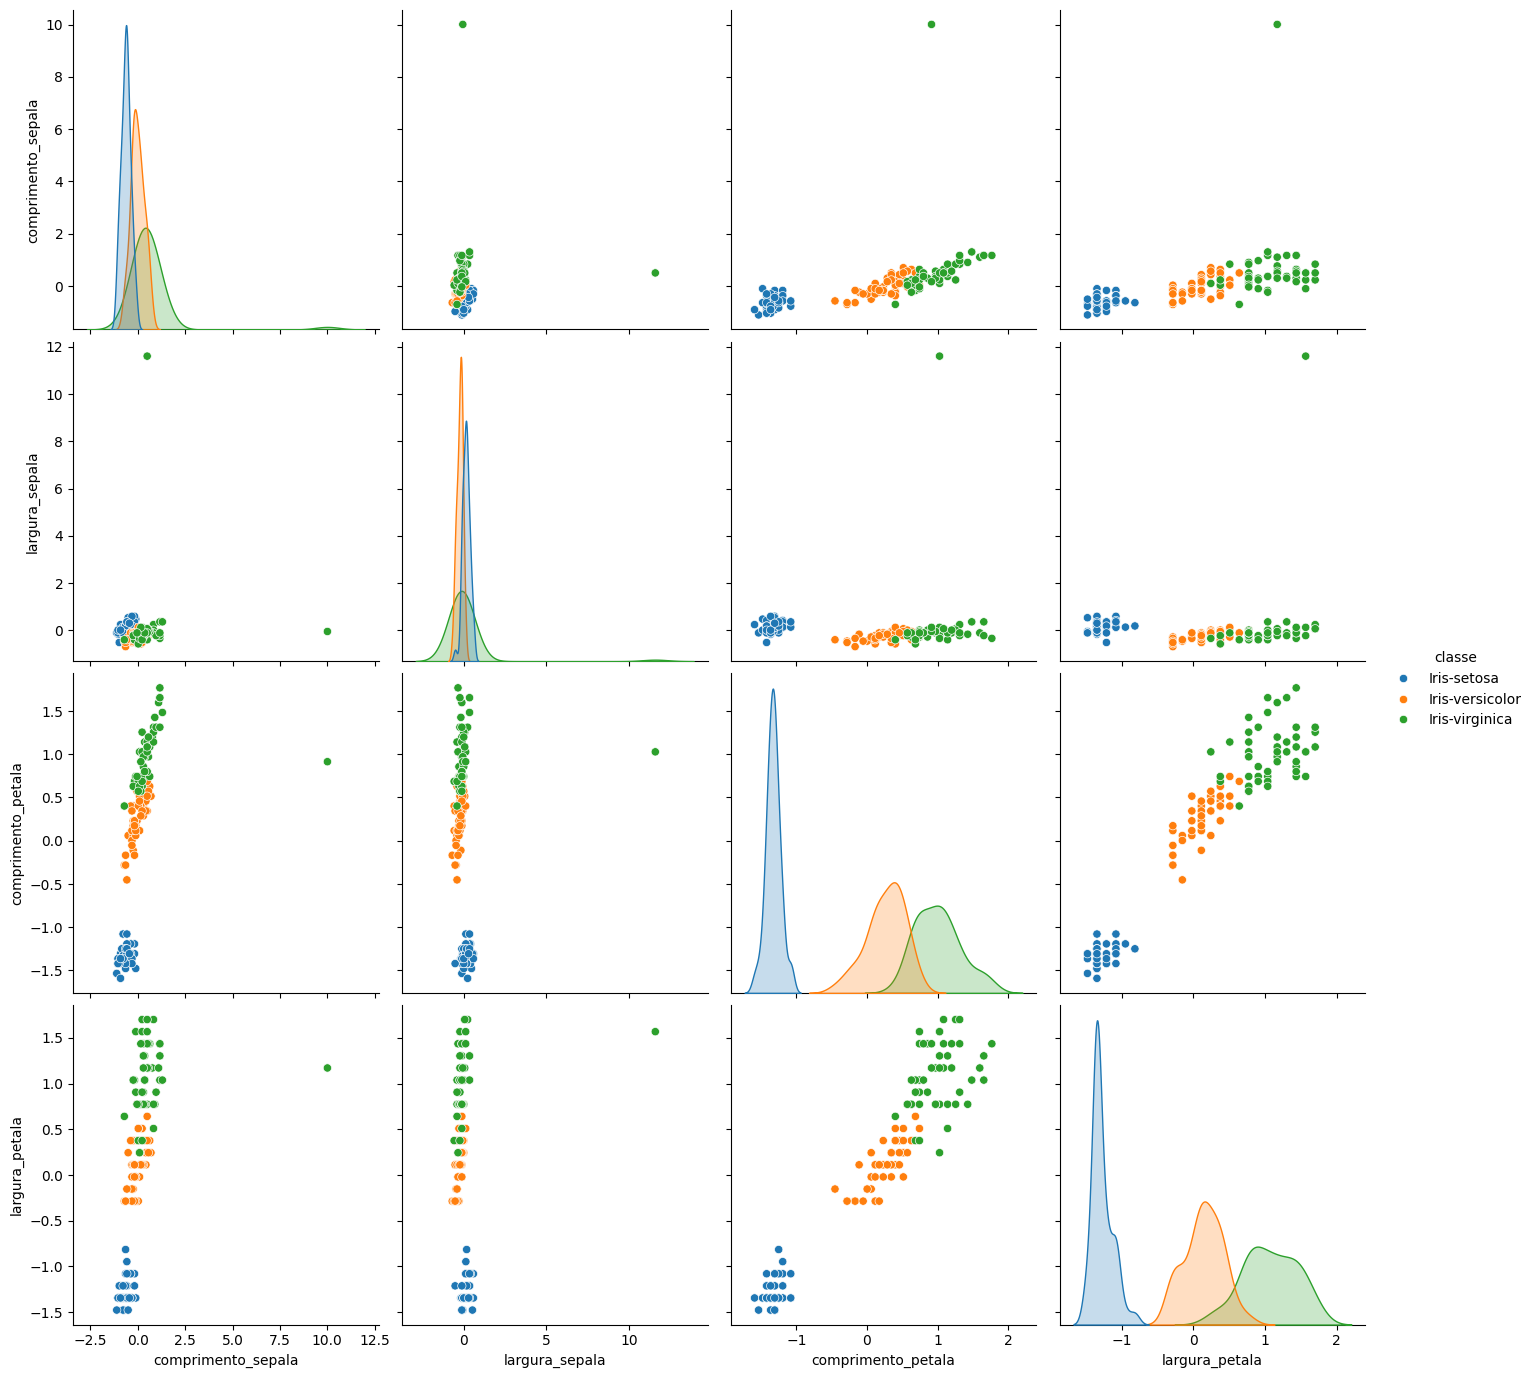

In [108]:
# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='classe', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Observando os gráficos de dispersão, é fácil perceber que existem duas amostras da classe *Iris-virginica* que estão deslocadas no espaço em relação às demais amostras.

Pelos gráficos, os *outliers* parecem ser mais visíveis na combinação dos atributos `comprimento_sepala` e `largura_sepala`. Então, vamos usar a função `lmplot` da biblioteca `Seaborn`para visualizar a combinação desses dois atributos.

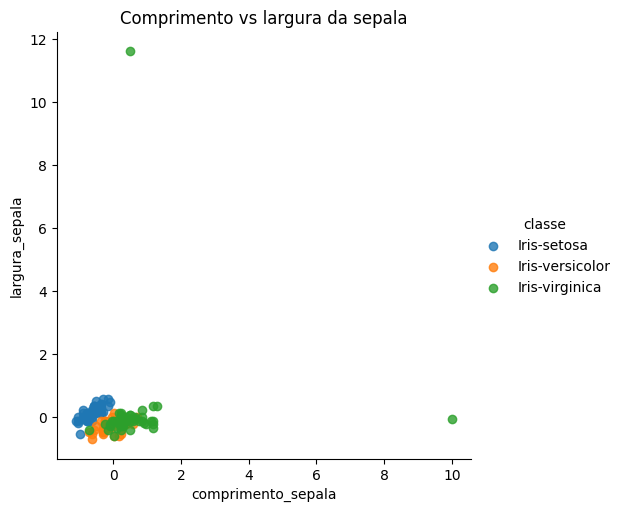

In [109]:
# define o scatter plot
sns.lmplot(x='comprimento_sepala', y='largura_sepala', data=df_dataset, 
           fit_reg=False,  
           hue='classe')

# cria um título para o gráfico
plt.title('Comprimento vs largura da sepala')

# mostra o gráfico
plt.show()

Pelos gráficos vistos até o momento, fica claro que um dos *outliers* possui um alto valor no atributo `largura_sepala`. Já o segundo outlier contém um alto valor no atributo `comprimento_sepala`. 

A bilioteca `Seaborn` permite criar gráficos boxplot agrupados por um determinado atributo, o que facilita a análise dos dados. No exemplo abaixo, criaremos boxplots para cada atributo agrupados pela classe.

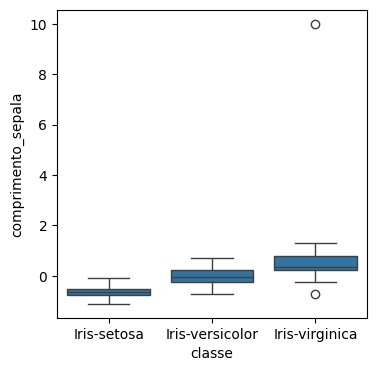

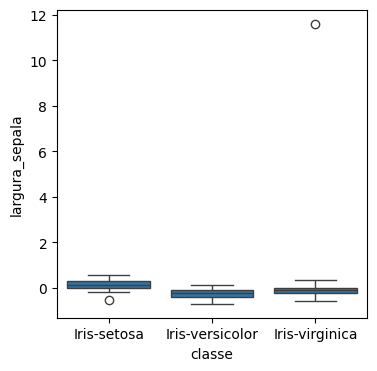

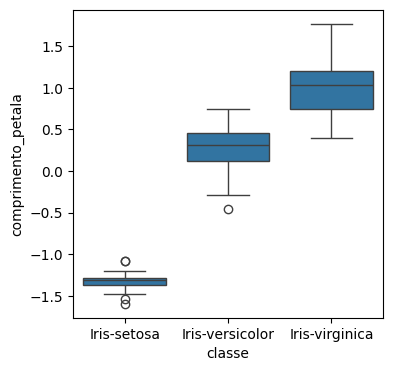

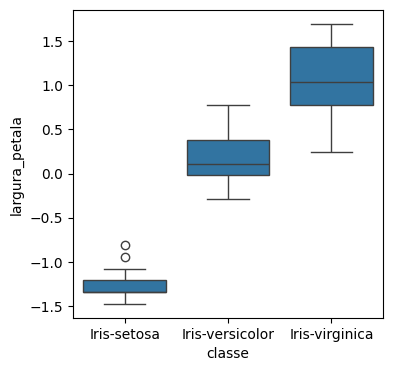

In [111]:
for atributo in df_dataset.columns[:-1]:
    # define a dimensão do gráfico
    plt.figure(figsize=(4,4))

    # cria o boxplot
    sns.boxplot(x="classe", y=atributo, data=df_dataset, whis=1.5)

    # mostra o gráfico
    plt.show()

Os box plots dos atributos mostraram outros *outliers* que não haviam aparecido no primeiro box plot. Portanto, esses novos valores são considerados *outliers* se analisarmos as classes individualmente, mas não são considerados *outliers* se analisarmos a base de dados de forma geral. 

Outro tipo de gráfico que ajuda a detectar *outliers* é o histograma. Portanto, vamos usá-lo para analisar cada atributo.

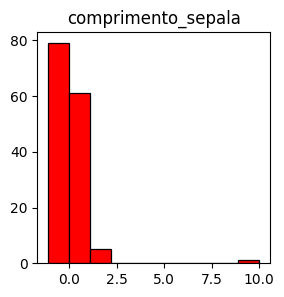

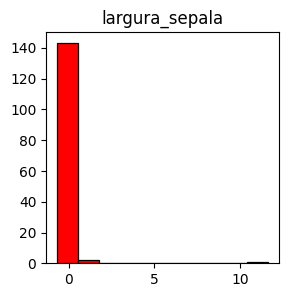

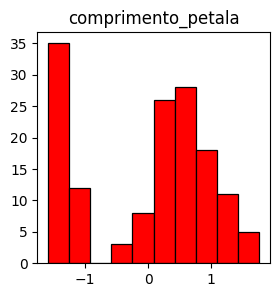

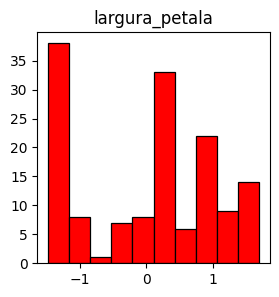

In [116]:
for atributo in df_dataset.columns[:-1]:
    plt.figure(figsize=(3,3))
    # cria o histograma
    n, bins, patches = plt.hist(df_dataset[atributo].values,bins=10, color='red', edgecolor='black', linewidth=0.9)

    # cria um título para o gráfico
    plt.title(atributo)
    

    # mostra o gráfico
    plt.show()

Nos histogramas, os *outliers* mais evidentes estão nos atributos `comprimento_sepala` e `largura_sepala`.

Agora, vamos usar um gráfico de densidade para fazer o mesmo tipo de análise.

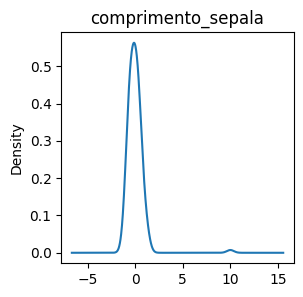

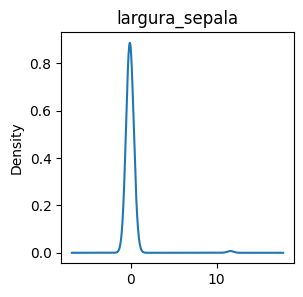

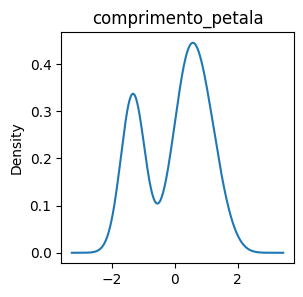

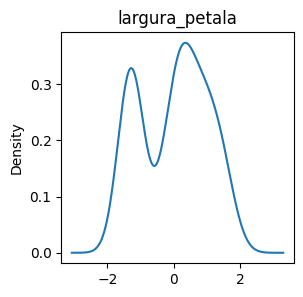

In [118]:
for atributo in df_dataset.columns[:-1]:

    plt.figure(figsize=(3,3))
    # criando o gráfico de densidade para cada atributo
    densityplot = df_dataset[atributo].plot(kind='density')
    
    # cria um título para o gráfico
    plt.title(atributo)

    # mostra o gráfico
    plt.show()

Conforme podemos ver pelos gráficos de densidade, a maioria dos valores dos atributos `comprimento_sepala` e `largura_sepala` estão próximos de 0. Portanto, as duas amostras que contém valores próximos de 10 nesses atributos, podem ser consideradas *outliers*.

Uma das maneiras mais simples de tratar *outliers* é remover aqueles valores que são menores que $Q1 - 1.5 * IQR$ ou maiores que $Q3 + 1.5 * IQR$, onde $Q1$ é o primeiro quartil, $Q3$ é o terceiro quartil e $IQR$ é o intervalo interquartil. O IQR pode ser calculado pela seguinte equação: $IQR = Q3-Q1$. 

Com base nessas informações, vamos usar a função abaixo para remover os *outliers* da base de dados. Usaremos como base o IQR de cada atributo em relação a todos os valores na base de dados, em vez do IQR individual de cada classe.

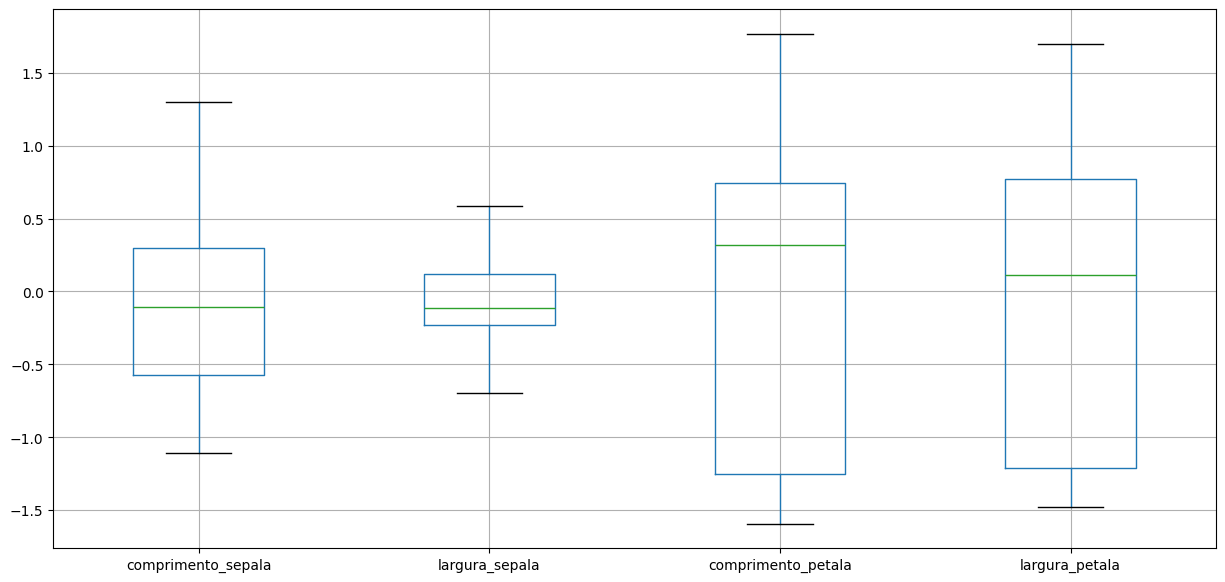

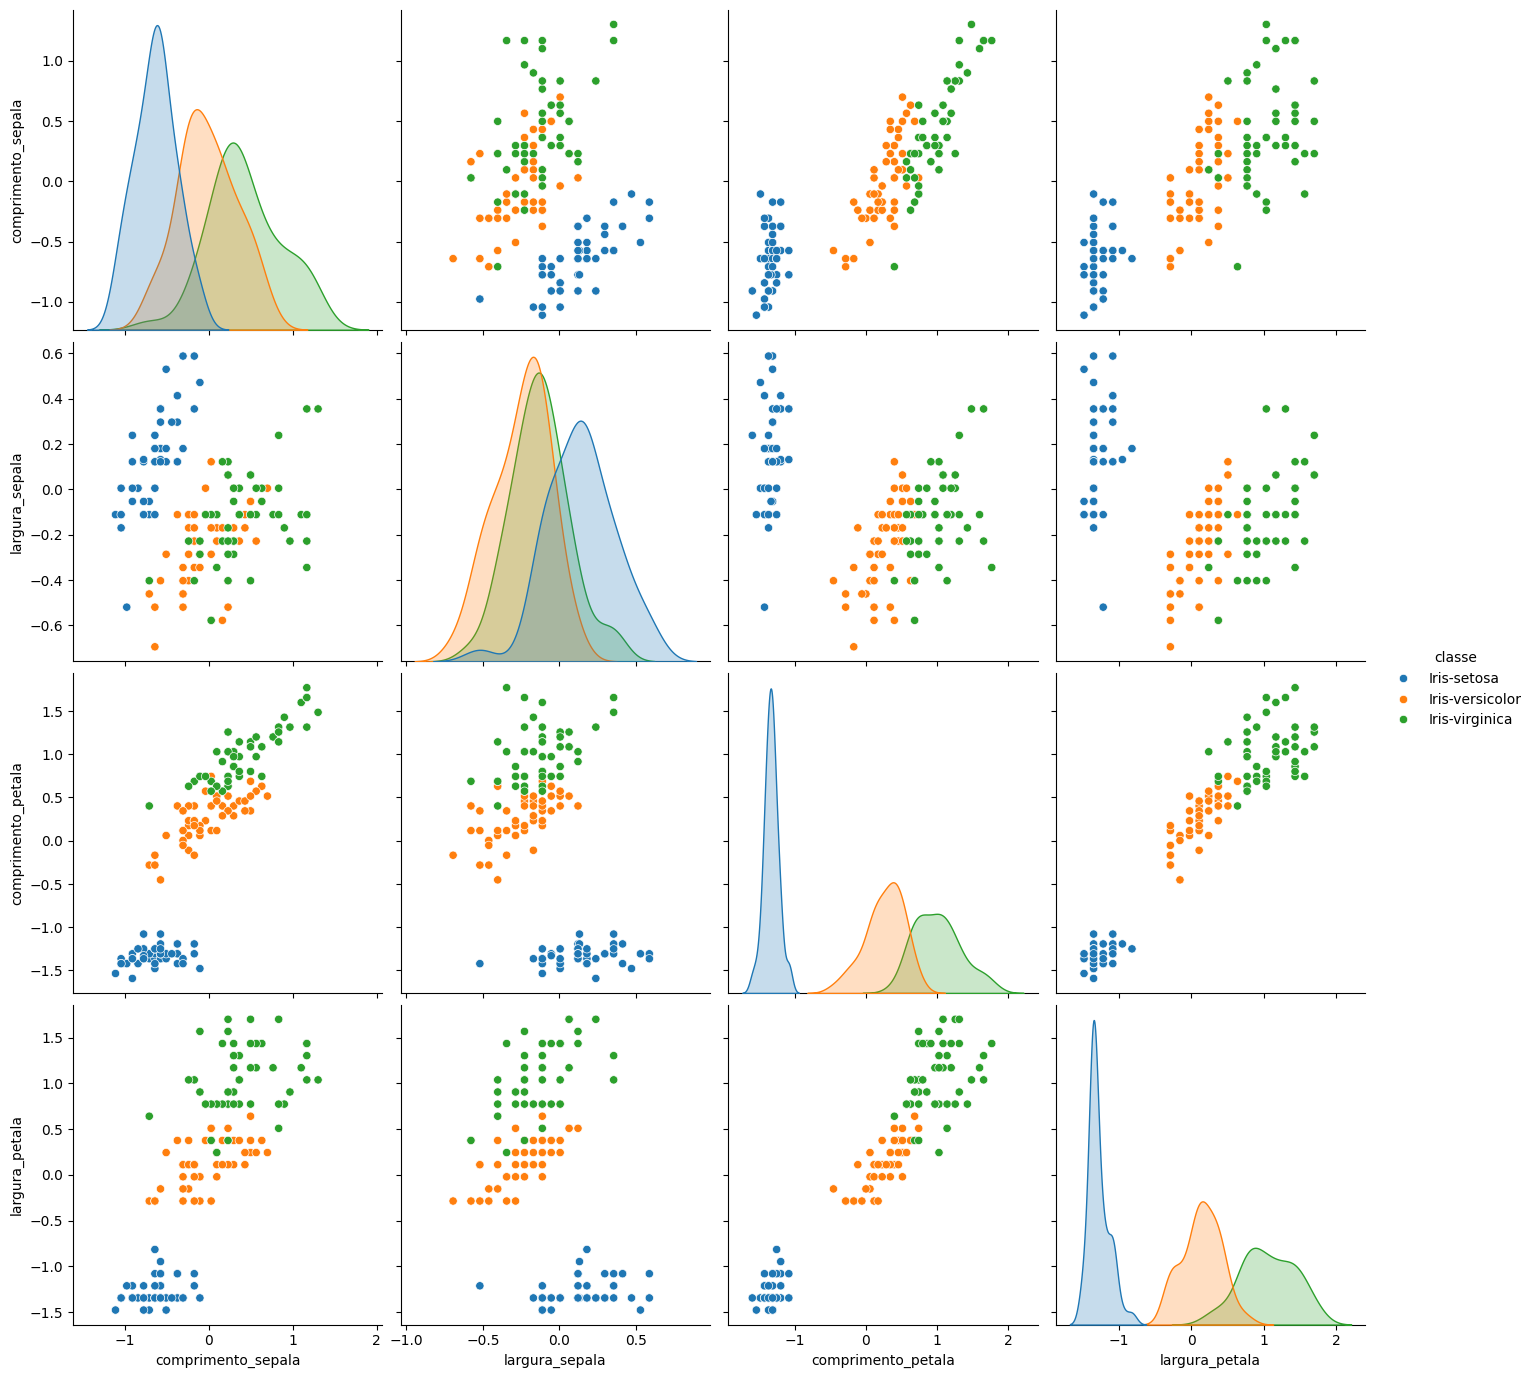

In [119]:
def removeOutliers(df_dataset):
    """
    Remove os outliers da base de dados 
    """
    
    for atributo in df_dataset.columns[:-1]:

        # obtem o terceiro e o primeiro quartil. 
        q75, q25 = np.percentile(df_dataset[atributo].values, [75 ,25])
        
        # calcula o IQR
        IQR = q75 - q25

        # remove os outliers com base no valor do IQR
        df_dataset = df_dataset[ (df_dataset[atributo]<=(q75+1.5*IQR)) & (df_dataset[atributo]>=(q25-1.5*IQR)) ]
    
    return df_dataset

# remove os outliers
df_dataset = removeOutliers( df_dataset )

# apresenta as principais estatísticas sobre a base de dados
df_dataset.boxplot(figsize=(15,7))
plt.show()

# matriz de gráficos scatter 
sns.pairplot(df_dataset, hue='classe', height=3.5);

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Depois da remoção, o box plot e os gráficos de dispersão indicam que não há mais nenhum *outlier* na base de dados. 

Com os novos gráficos de dispersão, também é possível perceber que a classe *Iris-setosa* é mais fácil de identificar, pois está mais separada no espaço de atributos. Por outro lado, em várias combinações de atributos, as classes *Iris-versicolor* e *Iris-virginica* se misturam.

**IMPORTANTE:** antes de realizar a remoção de *outliers*, é mandatório analisar cuidadosamente as características das amostras antes de removê-las. Em alguns casos, remover os *outliers* pode ser prejudicial. Além disso, algumas tarefas de aprendizado de máquina são voltadas para a detecção de *outliers* e, portanto, esses dados não podem ser removidos. Adicionalmente, se a base de dados for desbalanceada, a remoção dos *outliers* com base nas estatísticas de toda a base, pode acabar removendo amostras da classe minoritária (aquela que possui menos amostras). Ainda, alguns métodos de classificação, tais como métodos baseados em *ensemble* e métodos baseados em árvores, costumam ser robustos a *outliers*. Diante disso, em alguns problemas, é recomendável remover apenas aqueles *outliers* que são claramente erros de leitura/digitação, isto é, valores que estão fora dos limites aceitáveis para o que é esperado para um determinado atributo (por exemplo, uma pessoa com 500 anos ou um bebê com 300 kg). 

## Pré-processamento: distribuição das classes

Outro passo importante na análise de dados é verificar a distribuição das classes. Para isso, é possível criar um gráfico de barra indicando quantas amostras de cada classe há na base de dados.

classe
Iris-versicolor    50
Iris-setosa        47
Iris-virginica     47
Name: count, dtype: int64

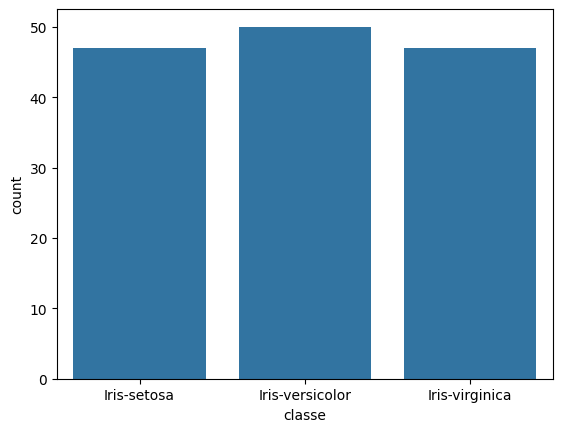

In [ ]:
display( df_dataset['classe'].value_counts() )

# cria um gráfico de barras com a frequência de cada classe
sns.countplot(x="classe", data=df_dataset)

# mostra o gráfico
plt.show()

Conforme podemos ver, as classes são balanceadas. Se o número de exemplos em alguma das classes fosse muito superior às demais, teríamos que usar alguma técnica de balanceamento de classes, pois o modelo gerado pela maioira dos métodos de aprendizado supervisionado costuma ser tendencioso para as classes com maior número de amostras. 

## Pré-processamento: correlação entre os atributos

Quando dois atributos possuem valores idênticos ou muito semelhantes para todas as amostras, um deles deve ser eliminado ou eles devem ser combinados. Isso ajuda a diminuir o custo computacional das tarefas de aprendizado e evita que o aprendizado de alguns método seja prejudicado, principalmente os métodos baseados em otimização.

Uma das maneiras mais comuns de analisar a correlação dos dados é através das matrizes de correlação e covariância. Podemos fazer isso usando a biblioteca `Numpy` ou a `Pandas`.

Primeiro, vamos fazer usando a `Numpy`.

In [ ]:
# criando uma matriz X com os valores do data frame
X = df_dataset.iloc[:,:-1].values

# matriz de covariancia
covariance = np.cov(X, rowvar=False)

# matriz de correlação
correlation = np.corrcoef(X, rowvar=False)

print('Matriz de covariância: ')
display(covariance)

print('\n\nMatriz de correlação: ')
display(correlation)

Matriz de covariância: 


array([[ 0.30676543, -0.01565835,  0.48133208,  0.44703238],
       [-0.01565835,  0.06514528, -0.10838199, -0.09181008],
       [ 0.48133208, -0.10838199,  1.00057004,  0.955908  ],
       [ 0.44703238, -0.09181008,  0.955908  ,  0.98688341]])



Matriz de correlação: 


array([[ 1.        , -0.11076465,  0.86879609,  0.81246161],
       [-0.11076465,  1.        , -0.42451388, -0.36208953],
       [ 0.86879609, -0.42451388,  1.        ,  0.96196534],
       [ 0.81246161, -0.36208953,  0.96196534,  1.        ]])

Agora, vamos calcular as matrizes de correlação e covariância usando a `Pandas`.

In [ ]:
# matriz de covariancia
df_covariance = df_dataset.cov()

# matriz de correlação
df_correlation = df_dataset.corr()

print('Matriz de covariância: ')
display(df_covariance)

print('\n\nMatriz de correlação: ')
display(df_correlation)

ValueError: could not convert string to float: 'Iris-setosa'

Podemos ver que os atributos `comprimento_petala` e `largura_petala` possuem alta covariância e alta correlação. Se o problema que estamos analisando tivesse muitos atributos, poderíamos pensar na possibilidade de combinar esses dois atributos. Se a correlação entre dois atributos for igual a 1 ou -1, significa que eles são redundantes e um deles poderia ser eliminado.

Para facilitar a visualização, vamos plotar a matriz de covariância e a de correlação usando mapas de cores.

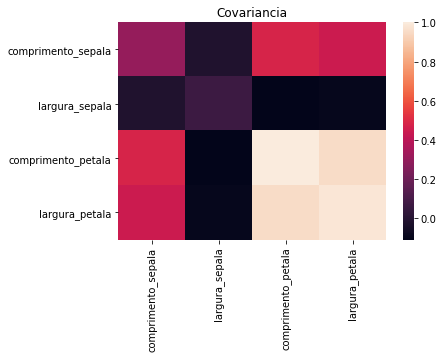

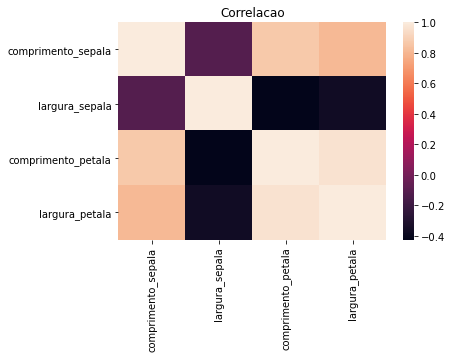

In [ ]:
# cria um mapa de cores dos valores da covariancia
sns.heatmap(df_covariance, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Covariancia')
plt.show()

# cria um mapa de cores dos valores da correlação
sns.heatmap(df_correlation, 
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlacao')
plt.show()

É importante notar que a alta correlação entre dois atributos não significa que um deles influencia no valor do outro. Veja alguns exemplos que mostram isso em <http://www.tylervigen.com/spurious-correlations>.

<img src="http://tylervigen.com/correlation_project/correlation_images/number-of-people-who-tripped-over-their-own-two-feet-and-died_number-of-lawyers-in-nevada.png" width="800" align="center"/>

<img src="http://tylervigen.com/correlation_project/correlation_images/works-of-visual-art-copyrighted-us_females-in-new-york-who-slipped-or-tripped-to-their-death.png" width="800" align="center"/>


---
## Conclusão

Neste notebook, foram mostradas as principais etapas de visualização, interpretação e pré-processamento dos dados. Foi apresentado como  eliminar atributos  irrelevantes e tratar dados faltantes, redundantes ou inconsistentes. Além disso, foi mostrado como deve ser feita a normalização dos dados e quais os possíveis impactos dessa etapa no desempenho dos métodos de aprendizado. Ainda, foi mostrada uma das técnicas de remoção de outliers, como visualizar a distribuição das classes e como analisar a correlação dos atributos. Para obter maiores detalhes teóricos sobre os conceitos apresentados, consulte os Capítulos 2 (Análise de Dados) e 3 (Pré-processamento de Dados).

---
## Referências

[1] R. A. Fisher. The use of multiple measurements in taxonomic problems. Annual Eugenics, 7, Part II, 179-188 (1936). DOI: [10.1111/j.1469-1809.1936.tb02137.x](http://dx.doi.org/10.1111/j.1469-1809.1936.tb02137.x).

---